# Kevin Krause

## KU Data Analytics Bootcamp
## Module 5 Challenge
## May 4,2023

In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Prepare the Data

In [3]:
#Read the mouse and study data into a data frame and merge mouse data and the study results data together
Mouse_Data = Path("data/Mouse_metadata.csv")
Study_Results_Data = Path("data/Study_results.csv")

mouse_data_df = pd.read_csv(Mouse_Data)
study_results_data_df = pd.read_csv(Study_Results_Data)

mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
Mouse_StudyResults_Data_df = pd.merge(mouse_data_df,study_results_data_df,on=["Mouse ID","Mouse ID"])
Mouse_StudyResults_Data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Display the number of unique Mice IDs in the data
Mouse_StudyResults_Data_df["Mouse ID"].nunique()

249

In [7]:
Find_Dupes_df = Mouse_StudyResults_Data_df.groupby(['Mouse ID','Timepoint']).size().to_frame('Num_Occur').reset_index()
Find_Dupes_df
#Find_Dupes_df.head()

Find_Dupes_df.loc[Find_Dupes_df['Num_Occur'] > 1]

#The following mouse id has duplicate entries and they must be removed.

,Mouse ID,Timepoint,Num_Occur
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [8]:
#Display rows with Mouse ID of g989
Mouse_StudyResults_Data_df.loc[Mouse_StudyResults_Data_df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a new data framme that contains data with out Mouse ID g989.  Data is unreliable for g989 so it will be removed fromt
# the results
Clean_Mouse_StudyResults_Data_df = Mouse_StudyResults_Data_df[Mouse_StudyResults_Data_df["Mouse ID"] != 'g989']
                                                              

In [10]:
# Validate that mouse g989 has been removed
Clean_Mouse_StudyResults_Data_df.loc[Clean_Mouse_StudyResults_Data_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [11]:
# Display the number of unique Mice IDs in the data set now that the duplicates have been removed.
Clean_Mouse_StudyResults_Data_df["Mouse ID"].nunique()

248

In [12]:
#Determine if any duplicates are left.
Find_Dupes2_df = Clean_Mouse_StudyResults_Data_df.groupby(['Mouse ID','Timepoint']).size().to_frame('Num_Occur').reset_index()
Find_Dupes2_df
#Find_Dupes_df.head()

Find_Dupes2_df.loc[Find_Dupes2_df['Num_Occur'] > 1]

,Mouse ID,Timepoint,Num_Occur


## Generate Summary Statistics

In [13]:
# Find the Mean, Median, Variance, Standard Deviation, and SEM of the Tumor Volume (mm3) data for each drug
Mean_of_Regiman = Clean_Mouse_StudyResults_Data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame('Mean_TVmm').reset_index()
Median_of_Regiman = Clean_Mouse_StudyResults_Data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().to_frame('Median_TV').reset_index()
Variance_of_Regiman = Clean_Mouse_StudyResults_Data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().to_frame('Variance_TV').reset_index()
STDVar_of_Regiman = Clean_Mouse_StudyResults_Data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().to_frame('STD_Dev_TV').reset_index()
SEM_of_Regiman = Clean_Mouse_StudyResults_Data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().to_frame('SEM_TV').reset_index()
Mean_of_Regiman

,Drug Regimen,Mean_TVmm
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.320930
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [14]:
# Create a new dataframe with a summary of the statistics found above by merging the individual
# dataframes together on Drug Regimen
Stats_Summary1 = pd.merge(Mean_of_Regiman,Median_of_Regiman,on=["Drug Regimen","Drug Regimen"])
Stats_Summary2 = pd.merge(Stats_Summary1,Variance_of_Regiman,on=["Drug Regimen","Drug Regimen"])
Stats_Summary3 = pd.merge(Stats_Summary2,STDVar_of_Regiman,on=["Drug Regimen","Drug Regimen"])
Stats_Summary = pd.merge(Stats_Summary3,SEM_of_Regiman,on=["Drug Regimen","Drug Regimen"])
Stats_Summary


,Drug Regimen,Mean_TVmm,Median_TV,Variance_TV,STD_Dev_TV,SEM_TV
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Create Bar Charts and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

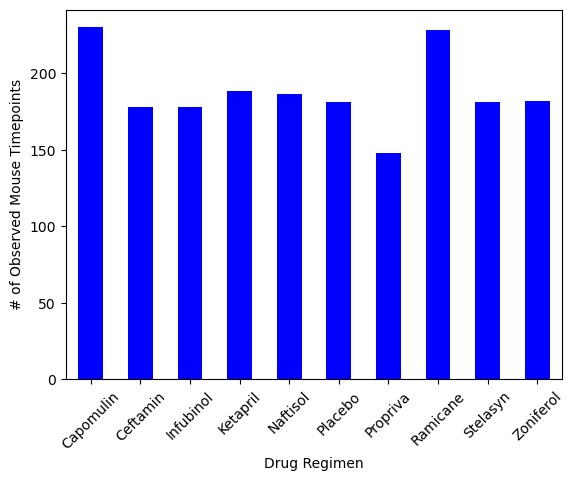

In [15]:
# Use Dataframe.plot to create a bar chart
Clean_Mouse_StudyResults_Data_df.groupby(['Drug Regimen',]).size().plot(kind='bar',rot=45,
                                            fontsize=10, color='b',
                                            xlabel="Drug Regimen",
                                            ylabel="# of Observed Mouse Timepoints")

<function matplotlib.pyplot.show(close=None, block=None)>

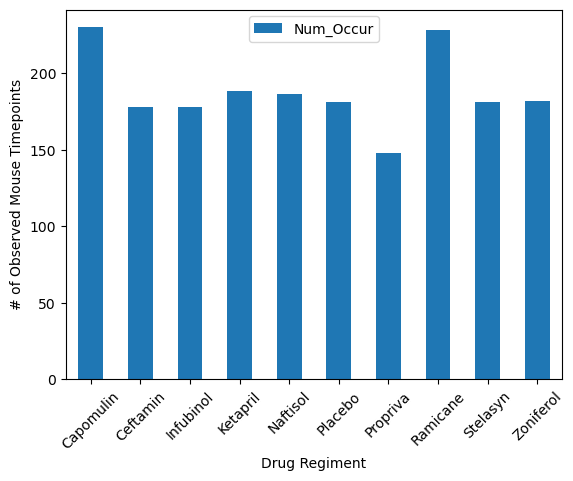

In [16]:
#Use matplotlib to create bar chart.
Drug_Timepoints_df = Clean_Mouse_StudyResults_Data_df.groupby(['Drug Regimen',]).size().to_frame('Num_Occur').reset_index()
Drug_Timepoints_df.set_index("Drug Regimen")
Drug_Timepoints_df.plot(kind='bar')
plt.xlabel('Drug Regiment')
plt.ylabel('# of Observed Mouse Timepoints')
#x_axis = int(10)
#tick_locations = [ for value in x_axis]
#plt.bar(x_axis,alpha=.5,align="center",height=9)
plt.xticks([0,1,2,3,4,5,6,7,8,9], ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation=45)

plt.show

<Axes: ylabel='Sex'>

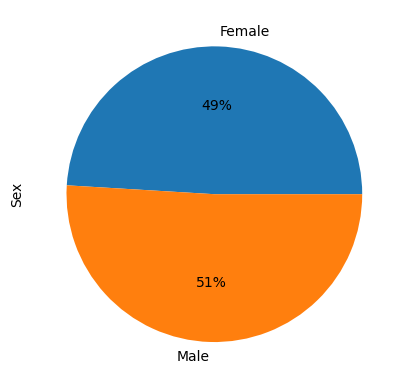

In [17]:
## Use Dataframe.plot to create a pie chart
Clean_Mouse_StudyResults_Data_df.groupby(['Sex',]).size().plot(kind='pie',ylabel='Sex',autopct='%1.0f%%')


Text(0, 0.5, 'Sex')

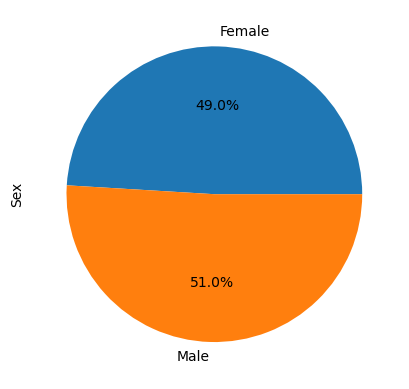

In [18]:
# Use pyplot to create a bar chart
Mouse_Sex_df = Clean_Mouse_StudyResults_Data_df.groupby(['Sex',]).size().to_frame('Num_Occur').reset_index()
Mouse_Sex_df
Number_of_Occurs = Mouse_Sex_df['Num_Occur']
Sex_Labels =  Mouse_Sex_df['Sex']
Sex_Labels
plt.pie(Mouse_Sex_df['Num_Occur'], labels = Sex_Labels, autopct='%1.1f%%')
plt.ylabel('Sex')


## Calculate Quartiles

In [19]:
#the last (greatest) timepoint for each mouse
Max_Timepoint_Mouse_StudyResult_df = Clean_Mouse_StudyResults_Data_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
#Max_Timepoint_Mouse_StudyResult_df

In [20]:
Clean_MAX_TP_Mouse_StudyResult_df = pd.merge(Max_Timepoint_Mouse_StudyResult_df[['Mouse ID','Timepoint']],
                                             Clean_Mouse_StudyResults_Data_df[['Mouse ID','Timepoint','Drug Regimen',
                                                                              'Sex','Age_months','Weight (g)',
                                                                               'Tumor Volume (mm3)','Metastatic Sites']],
                                             on=["Mouse ID","Timepoint"])
Clean_MAX_TP_Mouse_StudyResult_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [21]:
# Put treatments into a list for for loop
Treatment_Group = ['Capomulin','Ramicane','Infubinol','Ceftamin']


In [22]:
#empty list to fill with tumor vol data
Tumor_Volume_Data = []
Tumor_Volume_Data


[]

In [23]:
# Determine IQR for 4 drug regimens and save data in Tumor_Volume_Data list
for trmnt in Treatment_Group:
    TV_Data = Clean_MAX_TP_Mouse_StudyResult_df[['Drug Regimen','Tumor Volume (mm3)']].loc[Clean_MAX_TP_Mouse_StudyResult_df['Drug Regimen'] == trmnt]
    Q3 = np.quantile(TV_Data["Tumor Volume (mm3)"], 0.75)
    Q1 = np.quantile(TV_Data["Tumor Volume (mm3)"], 0.25)
    IQR = Q3 - Q1
    #print(TV_Data)
    append_data = TV_Data[['Drug Regimen','Tumor Volume (mm3)']] 
    Tumor_Volume_Data.append(append_data)
    print(f"3rd Quartile for {trmnt} is {Q3}" )
    print(f"1st Quartile for {trmnt} is {Q1}" )
    print(f"         IQR for {trmnt} is {IQR}" )

    print("===========================================")

    

3rd Quartile for Capomulin is 40.1592203
1st Quartile for Capomulin is 32.37735684
         IQR for Capomulin is 7.781863460000004
3rd Quartile for Ramicane is 40.65900627
1st Quartile for Ramicane is 31.56046955
         IQR for Ramicane is 9.098536719999998
3rd Quartile for Infubinol is 65.52574285
1st Quartile for Infubinol is 54.04860769
         IQR for Infubinol is 11.477135160000003
3rd Quartile for Ceftamin is 64.29983003
1st Quartile for Ceftamin is 48.72207785
         IQR for Ceftamin is 15.577752179999997


# Box Plot using Clean_MAX_TP_Mouse_StudyResult_df

In [24]:
# Save Tumor_Volume_Data from above in a list
Tumor_Volume_Data

[    Drug Regimen  Tumor Volume (mm3)
 19     Capomulin           38.982878
 24     Capomulin           38.939633
 61     Capomulin           30.485985
 64     Capomulin           37.074024
 66     Capomulin           40.159220
 80     Capomulin           47.685963
 83     Capomulin           37.311846
 85     Capomulin           38.125164
 87     Capomulin           38.753265
 108    Capomulin           41.483008
 115    Capomulin           38.846876
 121    Capomulin           28.430964
 124    Capomulin           33.329098
 162    Capomulin           46.539206
 163    Capomulin           32.377357
 169    Capomulin           41.581521
 174    Capomulin           23.343598
 180    Capomulin           40.728578
 183    Capomulin           34.455298
 192    Capomulin           31.023923
 204    Capomulin           40.658124
 208    Capomulin           39.952347
 220    Capomulin           36.041047
 226    Capomulin           28.484033
 239    Capomulin           31.896238,
     Drug R

ValueError: X must have 2 or fewer dimensions

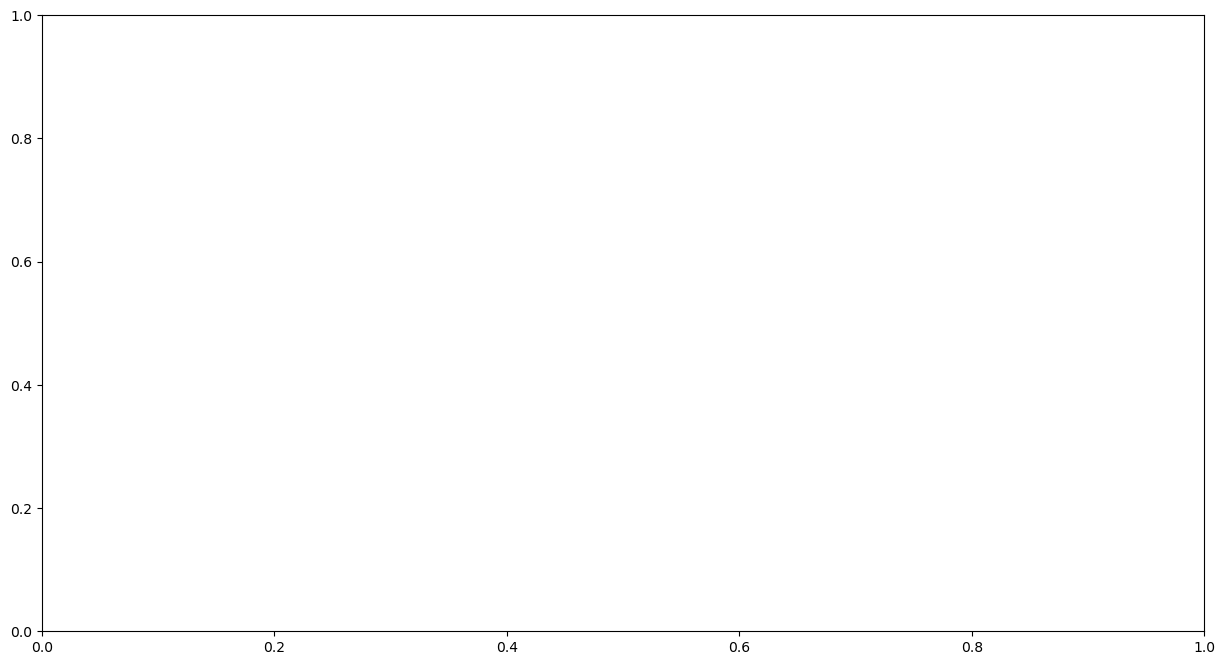

In [25]:
# Create Box Plot
fig = plt.figure(figsize =(15, 8))
 
# Creating plot
plt.boxplot(Tumor_Volume_Data)
 
# show plot
plt.show()

#                                 Create Line Plot

In [ ]:
# Line Plot Timepoint vs Tumor volume
tumvol_time_df = Clean_Mouse_StudyResults_Data_df.loc[Clean_Mouse_StudyResults_Data_df['Mouse ID'] == 's185']
x_axis_data = tumvol_time_df[['Timepoint']]
points = tumvol_time_df[['Tumor Volume (mm3)']]
plt.plot(x_axis_data,points)
plt.xlabel('TimePoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of mouse s185')
plt.show

In [ ]:
#Scatter Plot weight vs tumor volume
tumvol_wght_df = Clean_Mouse_StudyResults_Data_df.loc[Clean_Mouse_StudyResults_Data_df['Mouse ID'] == 's185']
x_axis_data = tumvol_wght_df[['Weight (g)']]
points = tumvol_time_df[['Tumor Volume (mm3)']]
plt.scatter(x_axis_data,points)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of mouse s185')
plt.show

In [ ]:
tumvol_time_df = Clean_Mouse_StudyResults_Data_df.loc[Clean_Mouse_StudyResults_Data_df['Mouse ID'] == 's185']
tumvol_time_df

In [ ]:
Clean_MAX_TP_Mouse_StudyResult_df

## Correlation and Regression

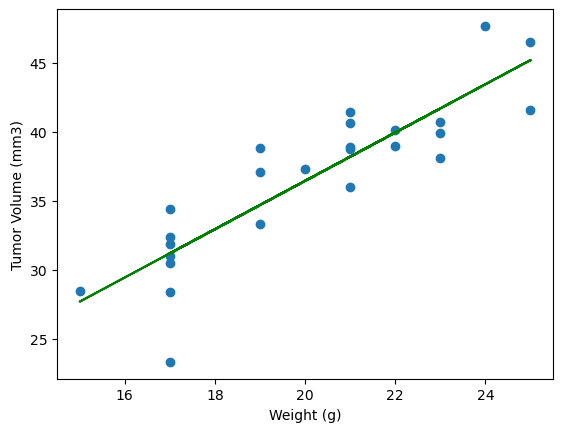

The correlation between the mouses weight and the tumor volume is 0.65


In [26]:
Capomulin_df   = Clean_MAX_TP_Mouse_StudyResult_df.loc[Clean_MAX_TP_Mouse_StudyResult_df['Drug Regimen'] == 'Capomulin']
x_values = Capomulin_df['Weight (g)']
y_values = Capomulin_df['Tumor Volume (mm3)']
corr=round(st.pearsonr(Clean_MAX_TP_Mouse_StudyResult_df['Weight (g)'],Clean_MAX_TP_Mouse_StudyResult_df['Tumor Volume (mm3)'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="green")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(f"The correlation between the mouses weight and the tumor volume is {corr}")